# 1. Import libraries

In [1]:
import os
import json
import numpy as np
from  tqdm import tqdm
import matplotlib.pyplot as plt

# 2. List all json files

In [15]:
annotation_dir = "/home/yangxue/Code/sensor_fusion/EarlyFusion/HT融合追踪交付0317/标注结果/"
sequences = os.listdir(annotation_dir)
print("Number of sequences: ", len(sequences))
sequences.sort()
# print(sequences)

Number of sequences:  55


In [16]:
all_frames = []
frames_size = 0
for seq in sequences:
    frames = os.listdir(annotation_dir + seq + "/livox")
    frames.sort()
    # print("Size of frames: ", len(frames))
    all_frames.append(frames)
    frames_size += len(frames)
print("Size of all_frames: ", frames_size)
# print(all_frames[0])

Size of all_frames:  2527


# 3. Load all json files

In [4]:
def get_json(json_file):
    with open(json_file, 'r') as load_f:
        json_content = json.load(load_f)
    objects_json = json_content["objects"]
    objects_list = []
    for object in objects_json:
        if not object["isLeave"]:
            object_id = object["objectid"]
            label = object["label"]
            # print(object["box2d"])
            if(object["box2d"] == {} or "x" not in (object["box2d"]["camera1"])):                
                box2d_x = -1
                box2d_y = -1
                box2d_h = -1
                box2d_w = -1
            else:            
                box2d_x = object["box2d"]["camera1"]["x"]
                box2d_y = object["box2d"]["camera1"]["y"]
                box2d_h = object["box2d"]["camera1"]["height"]
                box2d_w = object["box2d"]["camera1"]["width"]
            box3d_cx = object["center"]["x"]               
            box3d_cy = object["center"]["y"]
            box3d_cz = object["center"]["z"]
            box3d_dx = object["dimensions"]["length"]
            box3d_dy = object["dimensions"]["width"]
            box3d_dz = object["dimensions"]["height"]
            box3d_rx = object["rotation"]["x"]
            box3d_ry = object["rotation"]["y"]
            box3d_rz = object["rotation"]["z"]
            objects_list.append([float(label), box3d_cx, box3d_cy, box3d_cz,
                                box3d_dx, box3d_dy, box3d_dz, float(box3d_rx), float(box3d_ry),
                                box3d_rz, box2d_x, box2d_y, box2d_h, box2d_w, float(object_id)])
    return objects_list         
            
    
    

In [5]:
all_objects_list ={1:[],2:[],3:[],4:[],5:[],6:[]} # label -> list
idx_2_name = {1: 'Pedestrian', 2: 'Truck', 3: 'Widebody', 4: 'Car', 5: 'Auxiliary', 6: 'Excavator'}
idx=0
for seq_idx in range(len(sequences)):
    for frame_idx in range(len(all_frames[seq_idx])):
        json_file = annotation_dir + sequences[seq_idx] + "/livox/" + all_frames[seq_idx][frame_idx]
        # print(seq_idx, frame_idx)
        frame_objects_list = get_json(json_file)
        for each_object in frame_objects_list:            
            idx+=1
            all_objects_list[int(each_object[0])].append(each_object)     
print("Objects Number: ", idx)

Objects Number:  3944


In [6]:
label_objects_dict = {} # label (int) -> objects (np.array)
for i in range(6):
    print("Number of {} : {}".format(idx_2_name[i+1], len(all_objects_list[i+1])))
    label_objects_dict[i+1] = np.array(all_objects_list[i+1])


Number of Pedestrian : 130
Number of Truck : 2432
Number of Widebody : 299
Number of Car : 362
Number of Auxiliary : 364
Number of Excavator : 357


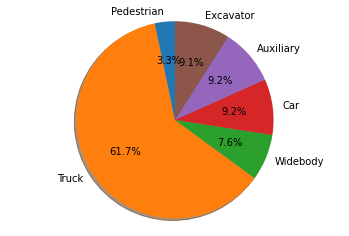

In [11]:
labels = []
sizes = []
explode = []
for i in range(6):
    sizes.append(label_objects_dict[i+1].shape[0])
    labels.append(idx_2_name[i+1])
    explode.append(0)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
# sizes = [15, 30, 45, 10]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=tuple(explode), labels=tuple(labels), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# 4. Analyze truck data

In [14]:
# truck analysis
trucks = label_objects_dict[2]
print(np.max(trucks[1:500,1:4], 0))
print(np.max(trucks[500:1000,1:4], 0))
print(np.max(trucks[1000:1500,1:4], 0))
print(np.max(trucks[1500:2000,1:4], 0))

print(np.percentile(trucks[:,1:2], 30))
print(np.median(trucks[:,1:2]))

[396.99492772  82.39080861  18.18428108]
[408.56326155 105.8575319   19.19783119]
[366.21285454  47.56931316   5.00930146]
[357.21193021  89.11099962  18.67201572]
84.50719847317605
111.09376136614783


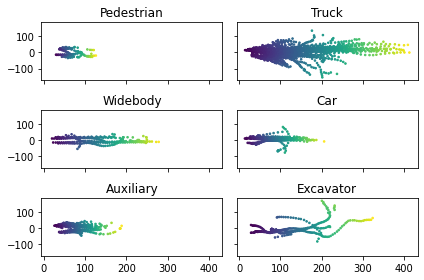

In [29]:

fig2, ax2 = plt.subplots(3,2,sharex=True, sharey=True)

for i in range(6):
    objects_label = idx_2_name[i+1]
    objects_arr = label_objects_dict[i+1]
    x = [:,1:2]
    y = objects_arr[:,2:3]
    z = np.sqrt(x**2 + y**2)
    ax2[i//2,i%2].scatter(x, y, s=10, c=z, marker=".")
    ax2[i//2,i%2].set_title(objects_label)
#     ax2[i//2,i%2].set_xlabel('x')
#     ax2[i//2,i%2].set_ylabel('y')
plt.tight_layout()
plt.show()

In [85]:
a = [[1,2],[3,4]]
np.array(a)


array([[1, 2],
       [3, 4]])

In [91]:
a=[]
b=[1,2]
a+=b
a

[1, 2]

In [13]:
a = np.array([1,2,3,4,5])
np.percentile(a,20)

1.8